<h1 style="font-size:36px;">Data exploration of INSPIRE, a publicly available research dataset for perioperative medicine</h1>

<h2 style="font-size:20px;">In this script data exploration and analysis of ""ward_vitals.csv" is shown</h2>

link: https://physionet.org/content/inspire/0.1/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels
import ipywidgets as widgets
import ipympl
%matplotlib widget

print("Libraries Imported")


Libraries Imported


In [2]:
df_ward_vitals_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\ward_vitals.csv')

In [3]:
df_ward_vitals = df_ward_vitals_original.copy()

In [4]:
df_ward_vitals.head(30)


,subject_id,chart_time,item_name,value
0,104192463,580,spo2,98.0
1,104192463,580,nibp_sbp,184.0
2,104192463,580,hr,96.0
3,104192463,580,nibp_dbp,114.0
4,104192463,580,bt,36.5
5,104192463,580,rr,16.0
6,104192463,825,spo2,96.0
7,104192463,825,nibp_sbp,162.0
8,104192463,825,hr,94.0
9,104192463,825,nibp_dbp,99.0


In [5]:
unique_subject_ids = df_ward_vitals['subject_id'].nunique()
print(unique_subject_ids)

99789


In [6]:
subject_id_counts = df_ward_vitals['subject_id'].value_counts()
first_five_subject_ids = subject_id_counts.head(30)
print(first_five_subject_ids)

subject_id
122395942    566315
139997521    528032
101406342    219450
190057952    132762
123174350     90307
107328754     80032
185630683     62466
116967580     51139
155667223     47498
151244123     47287
138367391     45710
149673433     44258
119536181     43116
167210631     40988
192149873     40432
147473251     37364
116535603     34843
197508852     34696
199254512     34136
188384371     33334
180449802     32782
128054712     32143
160381323     31997
147607600     31974
129282630     31576
170331533     30550
181462224     29673
124078924     29622
128573521     29528
147986980     29350
Name: count, dtype: int64


In [7]:
df_ward_vitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42679760 entries, 0 to 42679759
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   subject_id  int64  
 1   chart_time  int64  
 2   item_name   object 
 3   value       float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ GB


In [8]:
df_ward_vitals.describe()

,subject_id,chart_time,value
count,4.267976e+07,4.267976e+07,4.267867e+07
mean,1.491083e+08,2.948288e+05,8.096836e+02
std,2.881788e+07,7.333644e+05,4.828643e+06
min,1.000008e+08,-2.592000e+05,-9.600000e+01
25%,1.237287e+08,3.625000e+03,3.680000e+01
50%,1.481926e+08,1.110000e+04,7.200000e+01
75%,1.740061e+08,7.878000e+04,9.800000e+01
max,1.999994e+08,5.377905e+06,3.154500e+10


In [9]:
df_ward_vitals.columns

Index(['subject_id', 'chart_time', 'item_name', 'value'], dtype='object')

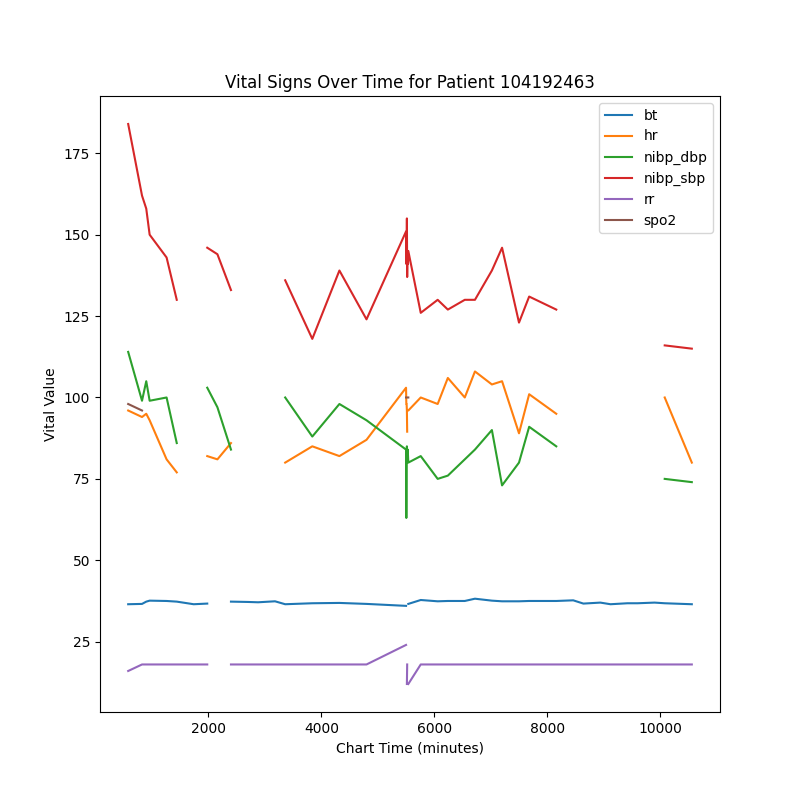

In [13]:
# Assuming df_vitals is your DataFrame
# Plot vitals for a single patient
def plot_patient_vitals(patient_id, df):
    patient_data = df[df['subject_id'] == patient_id]

    # Using pivot_table to handle duplicate entries
    # Here, you can change the 'aggfunc' to 'mean', 'sum', etc., depending on your requirement
    patient_vitals_pivot = patient_data.pivot_table(index='chart_time', columns='item_name', values='value', aggfunc='mean')

    # Plot each vital parameter
    plt.figure(figsize=(8, 8))
    for column in patient_vitals_pivot.columns:
        plt.plot(patient_vitals_pivot.index, patient_vitals_pivot[column], label=column)
    
    plt.xlabel('Chart Time (minutes)')
    plt.ylabel('Vital Value')
    plt.title(f'Vital Signs Over Time for Patient {patient_id}')
    plt.legend()
    plt.show()

# Plot vitals for a specific patient
plot_patient_vitals(104192463, df_ward_vitals)

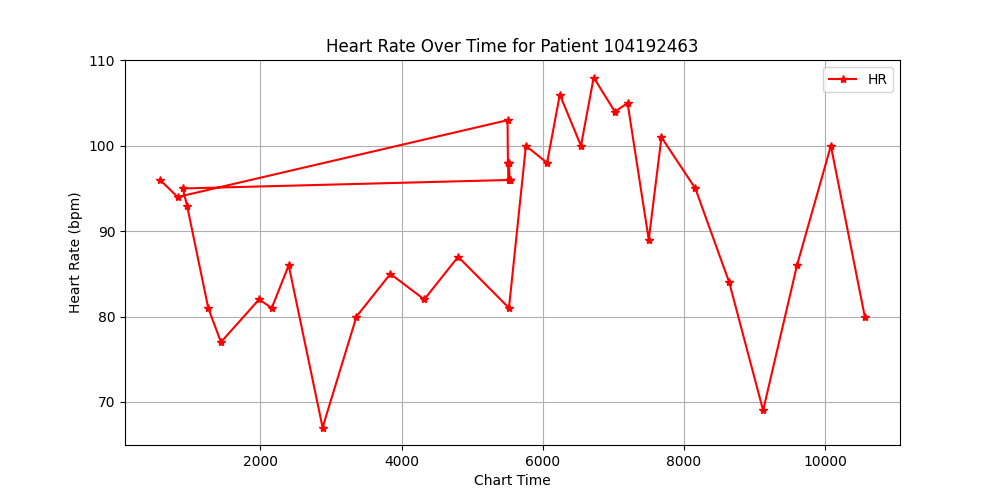

In [11]:

def plot_patient_hr(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'hr')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='HR', color='red', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title(f'Heart Rate Over Time for Patient {patient_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_hr(104192463, df_ward_vitals) # Replace 'df_vitals' with your actual DataFrame variable name


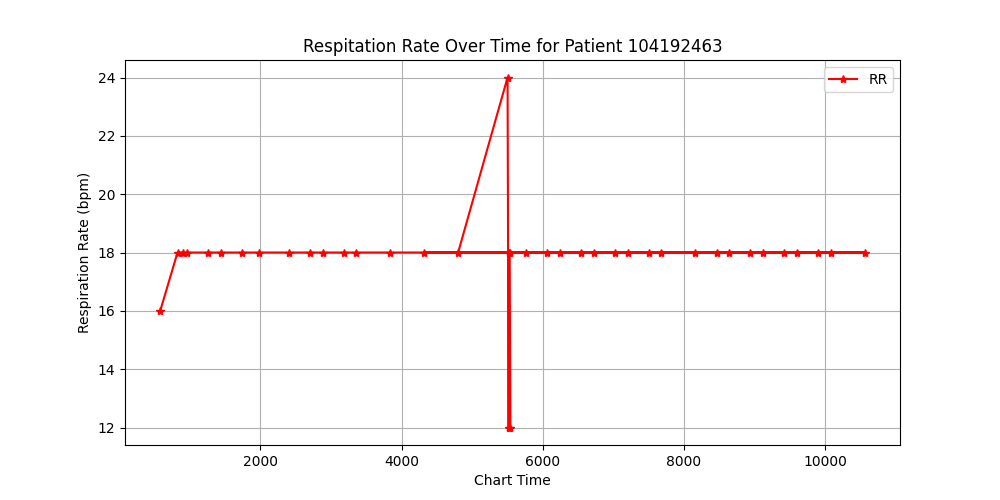

In [12]:


def plot_patient_hr(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'rr')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='RR', color='red', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('Respiration Rate (bpm)')
    plt.title(f'Respitation Rate Over Time for Patient {patient_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_hr(104192463, df_ward_vitals) # Replace 'df_vitals' with your actual DataFrame variable name
